## Heart Attack Risk Prediction: A Case Study

This Data is regarding the Heart Attack Risk Prediction where we having the multiple features to check the Heart Attack Risk. Now we'll perform a lot of analysis to our dataset also we'll create a ML model which will help us to get to know which Data consist to more heart attack risk.

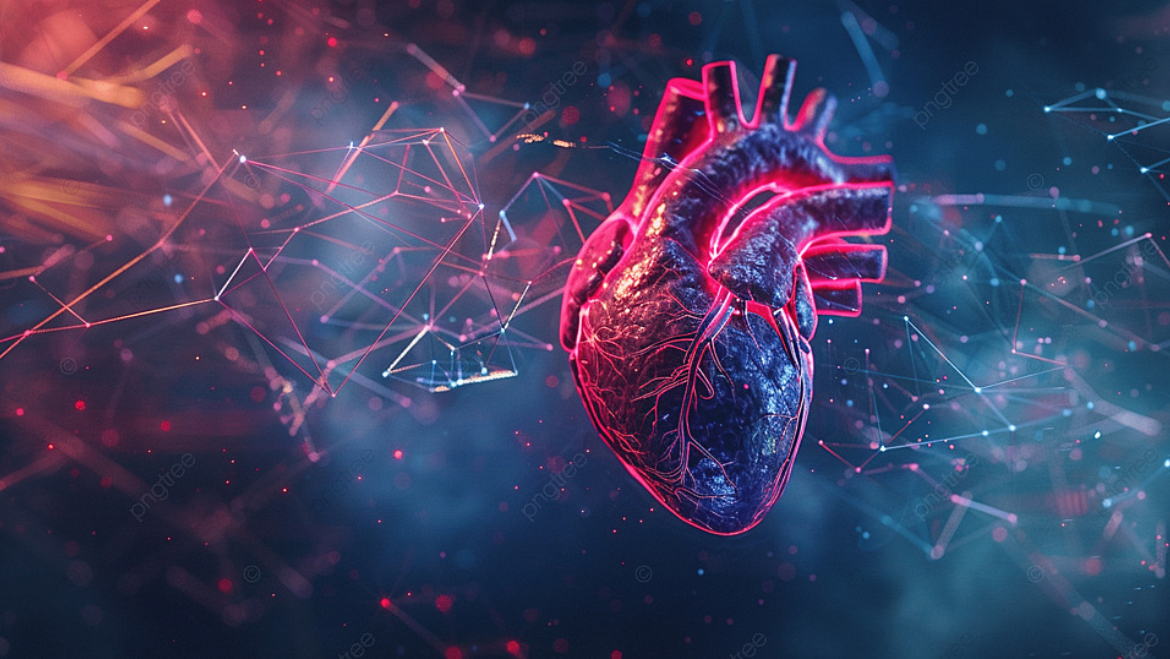

### About the Dataset:

* **Age-:** Age of the Patient
* **Sex-:** Gender of the Patient
* **CP-:** Type of Chest Pain
    * Value 1: typical angina
    * Value 2: A-typical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps-:** trestbps (Resting Blood Pressure)
* **Chol-:** Cholesterol
* **FBS-:** Fasting Blood Sugar
* **rest_ecg-:** Resting Electrocardiographic Results
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **exang-:** Exercise Induced Angina (1 - Yes; 0 - No)
* **OldPeak-:** Previous Peak
* **SLP-:** Slope
* **caa-:** Number of Major Vessels
* **thall-:** Thallium Stress Test Result (0-3)
* **Output-:** Whether the Patient Has Heart Attack Risk or Not
  * 1 - The Person Has Heart Attack Risk
  * 2 - The Person Does Not Have Heart Attack Risk
iatic

#### Loading the Standard Libraries

In [190]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as sts

#### Loading the Dataset

In [191]:
df = pd.read_csv('Dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Fetching some information with data 

In [192]:
df.shape

(303, 14)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Observation-:** There having only **303** Record with **14** Features also there is no as such object or any irrelevant data type format which we need to transform all data are in the form of **int** and **float**

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Observation:-**
* Age :-
    *  The Maximum Age of Our Patient is :- 77
    *  The Miniumu Age of Our Patient is :- 29
    *  The Average Age of Our Patient is :- 55

* trtbps : - **Resting Blood Presure**
Our Resing Blood presure reading should be between 120 / 180. if it's more than 180 it's very critical condition we should immediate seek for medical treatment 
    * The Maximum trtbps of Our Patient is :- 200 which is very critical condition for our patients
    * The Minimum trtbs of Our Patient is :- 94 which is low blood presure which is not critical but it's not that much good for our health
    * The Agerage trtbs of Our Patients is :- 131 which is preety normal

* Chol :- **Cholesterol**
Our Cholerterol Level should under 200-240
    * The Maximum Cholerterol of Our Patient is :- 564 which can significantly increase the risk of heat attack
    * The minimum cholerterol of Our Patient is :- 211 which can also signficat increse the risk of heat attack
    * The Average Cholerterol of Our Patient is :- 246 which is preety normal

#### Let's do some Sainity of the Data

In [195]:
df.duplicated().sum()

1

In [196]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


**Observation-:** Our Data is containing only 1 duplicates values let's drop it out

In [197]:
df = df.drop_duplicates()

#### Let's Check the Unique Value in our dataset

In [198]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

#### Let's Check the Null Value From Our Dataset

In [199]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Observation:-** There are no as such missing values in our dataset

#### EDA 

In [200]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [201]:
cate_value = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

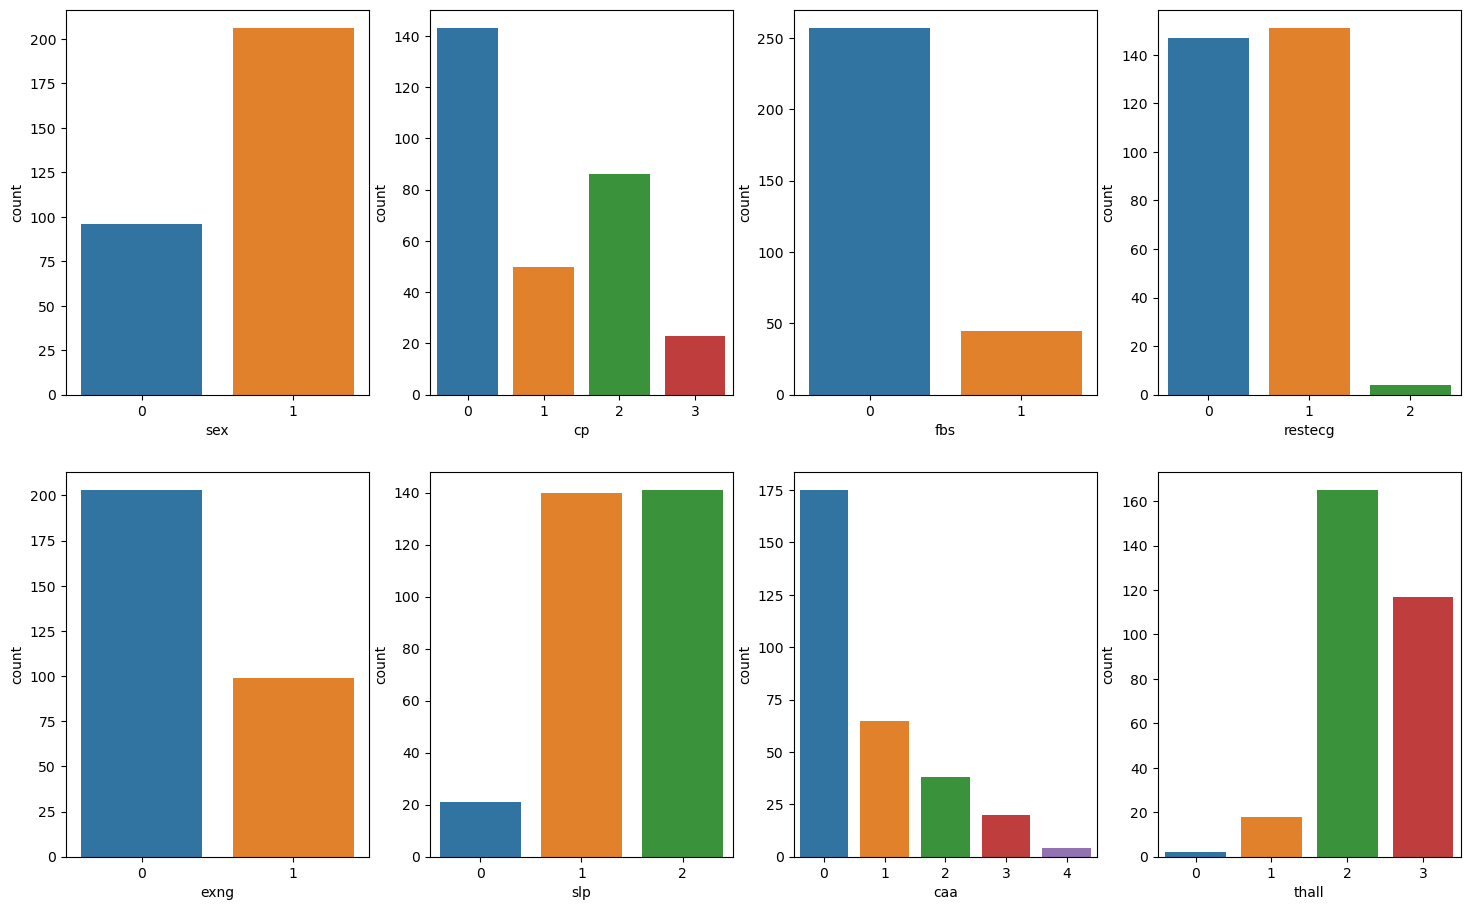

In [202]:
fig , axes = plt.subplots(2,4,figsize = (18,11))
axes = axes.flatten()
for i in range(len(cate_value)):
    sns.countplot(data = df , x = cate_value[i], ax = axes[i])

#### Countplot of Target

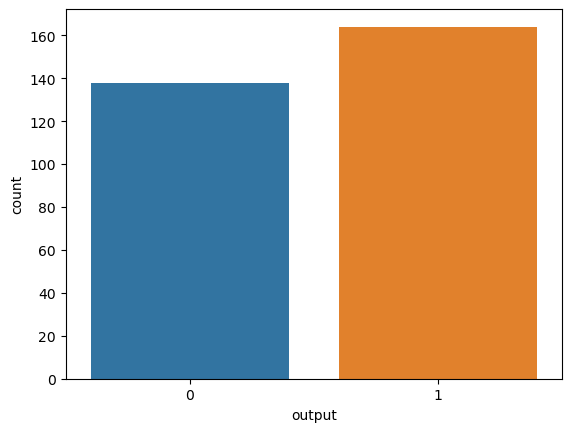

In [203]:
sns.countplot(data = df , x = 'output')
plt.show()

##### Let's See the Correleation on the matrix

In [204]:
num_col = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df_corr = df[num_col].corr().T
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


### Outliers

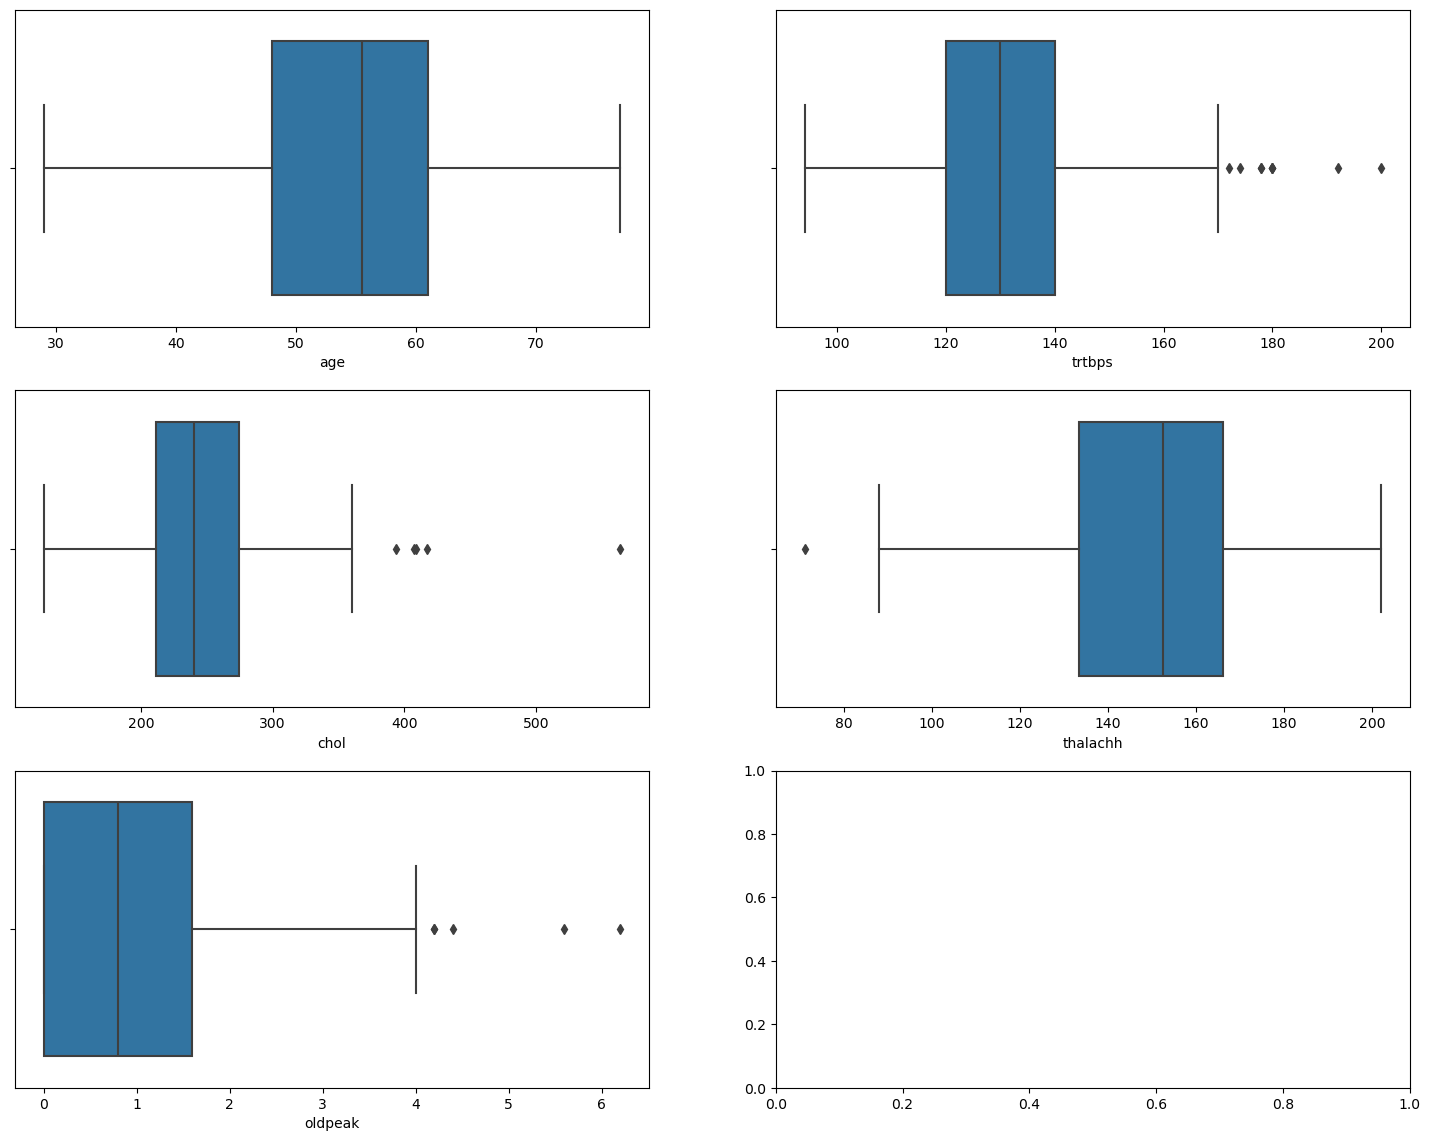

In [205]:
fig , axes = plt.subplots(3,2 , figsize = (18,14))
axes = axes.flatten()
for i in range(len(num_col)):
    sns.boxplot(data = df , x = num_col[i], ax = axes[i])
plt.show()

**Obsevation-:** As we can see there are some outliers in out dataset we can remove this if we don't lost lot of data

##### Removing the Outliers

In [206]:
s = set()
for i in df[num_col]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower_bond = q1 - 1.5 * (iqr)
    upper_bond = q3 + 1.5 * (iqr)
    index_ = df[(df[i] < lower_bond ) | (df[i] >upper_bond)].index.tolist()
    s.update(index_)
print(f"The Index Where We Have the Outliers : {s}")
print(f"The Number of Data Which we lost : {len(s)}")
df = df.drop(s)

The Index Where We Have the Outliers : {260, 8, 266, 272, 28, 291, 203, 204, 85, 220, 221, 223, 96, 101, 110, 241, 246, 248, 250}
The Number of Data Which we lost : 19


**Observation:-** We have lost almost 19 records which was treated as outliers now if we check that are still dataset is contating the outliers after applying method of removing the outliers

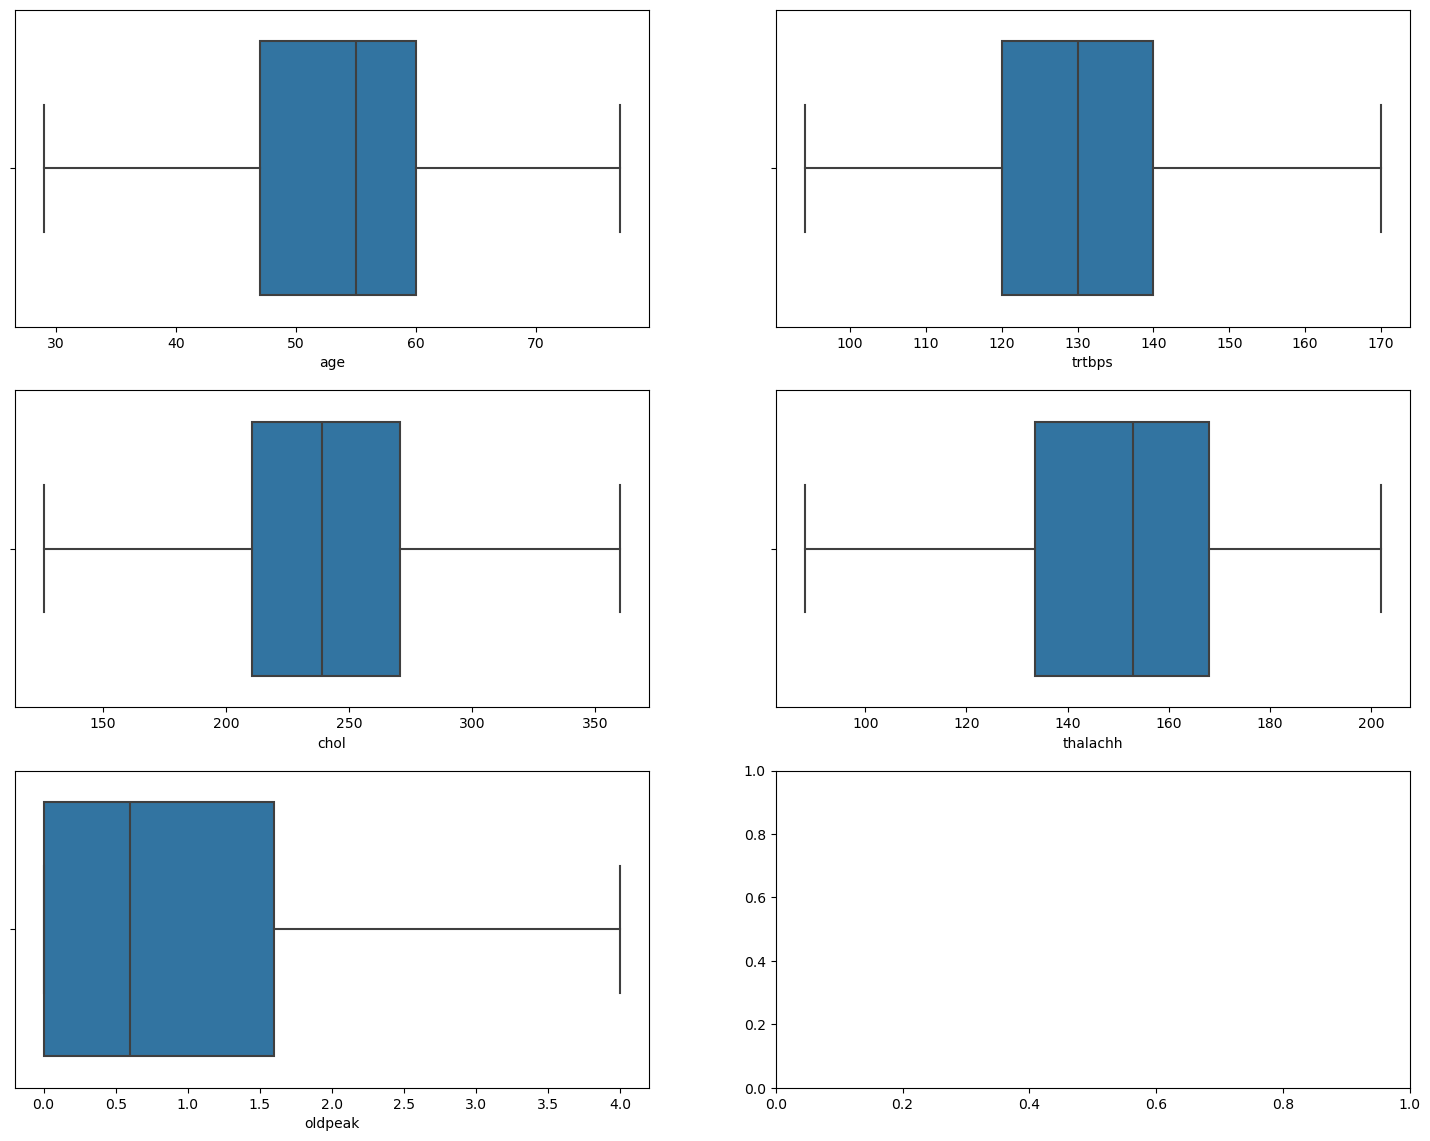

In [207]:
fig , axes = plt.subplots(3,2 , figsize = (18,14))
axes = axes.flatten()
for i in range(len(num_col)):
    sns.boxplot(data = df , x = num_col[i], ax = axes[i])
plt.show()

**Observation:-** As you can see there are no as such outliers is our dataset

#### Now We'll See the Distribution of the Continues Column 

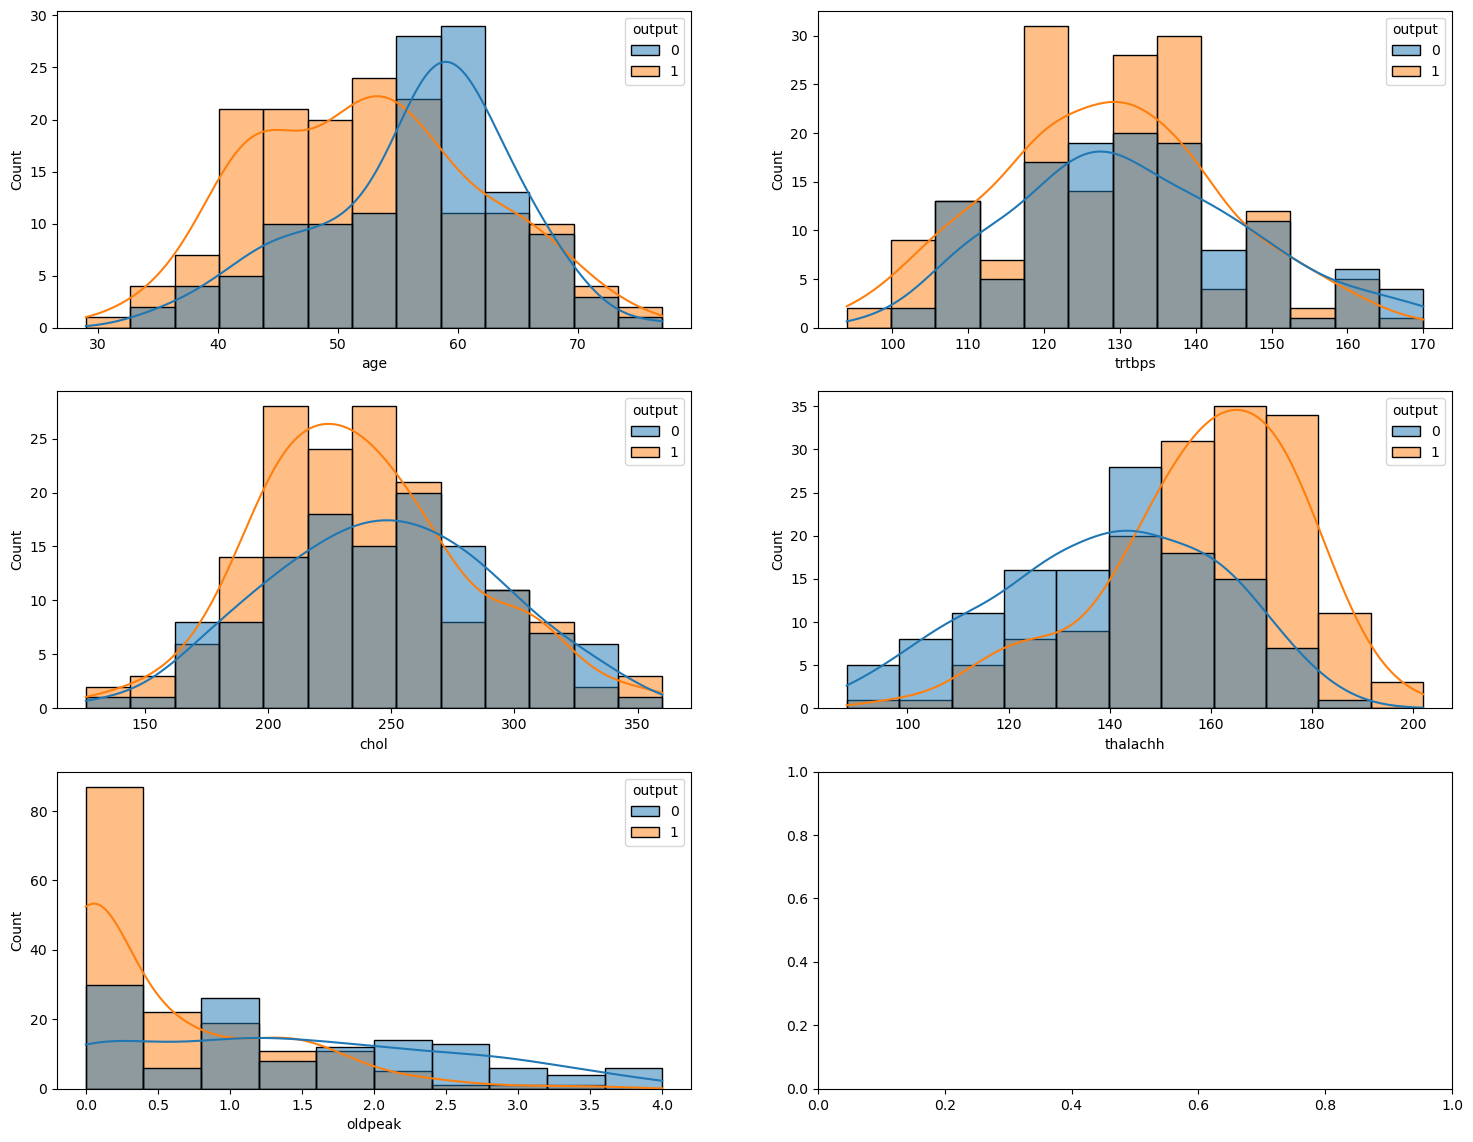

In [208]:
fig , axes = plt.subplots(3,2,figsize = (18,14))
axes = axes.flatten()
for i in range(len(num_col)):
    sns.histplot(data = df , x = num_col[i], hue = 'output', ax = axes[i], fill = True, kde = True)

**Observation-:** As we can see our age , trtbp , chol are normally distributed whereas oldpeak is left-skewed distribution and thalachh is a bit right skewed distributed.
* **Age:-**
  * More Risk of Heart Attack is between to Age Group of 40-55
  * Whereas is the Less Risk of Heart Attack is Between Age Group of 55-65
* **trtbps:- trestbps (Resting Blood Pressure).**
    * More Risk of Heart Attack Patient with low BP 95- 105 also with high BP of 120-140 some there is some patient is also there with the BP of 145-155.
    * Where as Less Risk of Heart Attack Patient **Resting Blood Pressure** is 140-145 also there some patient has been observed with low Risk of Heart Attack with the BP of 155-170
* **Chol (Cholesterol) :-**.
    * Cholesterol Level Make Huges impact of Heart Attack Risk. More People Having Heart Attack Risk with the Cholesterol Level of 145-250. but few people also have been observed with Heart Attack Risk at Cholesterol Level 350.
    * Where Less Risk of Heart Attack Risk of Patient has been observed 260 - 300.
* **thalachh (The Person Heart Rate Achieved) :-**
    * The Higher Risk of Heart Attack Patinent is 150-200
    * The Low Risk of Heart Attack Patient is 90 - 140

### Data Preprocessing

##### 1) Seperating the Dependent and Independent Features

In [209]:
df_ = df.copy()
x = df_.drop('output', axis = 1)
y = df_[['output']]

##### 2) Spliting the Dataset

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train , x_test , y_train,  y_test = train_test_split(x,y,random_state = 42 , test_size = 0.25)

In [212]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((212, 13), (212, 1), (71, 13), (71, 1))

### Feature Engineering

##### 1) Numerical Data Encoding

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
ss = StandardScaler()
ss

StandardScaler()

In [215]:
x_train[['age','trtbps','chol','thalachh']] = ss.fit_transform(x_train[['age','trtbps','chol','thalachh']])

In [216]:
def transform(x_test):
    x_test[['age','trtbps','chol','thalachh']] = ss_new.transform(x_test[['age','trtbps','chol','thalachh']])
    return x_test 

In [217]:
import pickle
f = open("Feature Scaler File\\StandardScaler.pkl", "wb")
pickle.dump(ss, f)
f.close()

### Modeling

##### 1) LogisticRegression

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
lr = LogisticRegression()
lr

LogisticRegression()

In [220]:
lr.fit(x_train , y_train)

LogisticRegression()

In [221]:
lr.coef_

array([[ 0.02512152, -1.30496145,  0.67026635, -0.28378598, -0.35751672,
        -0.28348342,  0.63866043,  0.74933245, -0.74104964, -0.54843962,
         0.49907719, -0.5671385 , -1.08789224]])

In [222]:
lr.intercept_

array([3.1373863])

In [223]:
import pickle 

In [224]:
file = open("Feature Scaler File\\StandardScaler.pkl", "rb")
ss_new = pickle.load(file)

In [225]:
def transform(x_test):
    x_test[['age','trtbps','chol','thalachh']] = ss_new.transform(x_test[['age','trtbps','chol','thalachh']])
    return x_test 

x_test_ = transform(x_test)

In [226]:
y_pred_test = lr.predict(x_test_)

In [227]:
pd.DataFrame({"predicted":y_pred_test, "actual":y_test['output']}).head()

,predicted,actual
10,1,1
263,1,0
145,1,1
216,0,0
77,1,1


In [228]:
lr.score(x_train, y_train)

0.8632075471698113

#### Accuracy 

In [229]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [230]:
print(classification_report(y_test ,y_pred_test ))
print(confusion_matrix(y_test, y_pred_test))
print(f"Accuracy Score of the Test Data-: {round(accuracy_score(y_test , y_pred_test)*100,3)} %")

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.80      0.88      0.84        41

    accuracy                           0.80        71
   macro avg       0.80      0.79      0.79        71
weighted avg       0.80      0.80      0.80        71

[[21  9]
 [ 5 36]]
Accuracy Score of the Test Data-: 80.282 %


**Observation:-** We got Test Accuracy as 83.099 we'll perform the hyperpermeter tunning to see weather we can improve the accuracy of the model or not

### Hyperperameter Tunning

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
parameter = {"penalty":["l1","l2","elasticnet"], "C" : [10,50,100, 500], "random_state" : [42], "solver":["liblinear","saga"]}

In [233]:
gsv = GridSearchCV(lr , param_grid = parameter, cv = 10)

In [234]:
gsv

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [10, 50, 100, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [42],
                         'solver': ['liblinear', 'saga']})

In [235]:
np.ravel(y_train).shape

(212,)

In [236]:
import warnings
warnings.filterwarnings('ignore')
gsv.fit(x_train ,y_train['output'])

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [10, 50, 100, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [42],
                         'solver': ['liblinear', 'saga']})

In [237]:
gsv.best_params_

{'C': 10, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}

In [238]:
gsv.best_estimator_

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [239]:
lr_ = LogisticRegression(C= 10, penalty='l2', random_state= 42, solver='liblinear')

**Observation-:** We have Added the Best Predicted Perameter into Logistic Regression. Now We'll See is there any changes in Accuracy Score

In [240]:
lr_.fit(x_train, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [241]:
lr_.coef_

array([[ 0.05318007, -1.60969064,  0.72833798, -0.32335647, -0.40054777,
        -0.36606581,  0.7601775 ,  0.82466617, -0.84674224, -0.52783103,
         0.6169009 , -0.58740307, -1.16395227]])

In [242]:
lr_.intercept_

array([3.27403243])

In [243]:
y_pred_test_ = lr_.predict(x_test)

In [244]:
print(f"The Training Score : {lr_.score(x_train , y_train)*100}")

The Training Score : 86.79245283018868


#### Now we'll check the score of accuracy

In [245]:
print(classification_report(y_test ,y_pred_test_ ))
print(confusion_matrix(y_test, y_pred_test_))
print(f"Accuracy Score of the Test Data-: {round(accuracy_score(y_test , y_pred_test_)*100,3)} %")

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.79      0.83      0.81        41

    accuracy                           0.77        71
   macro avg       0.77      0.76      0.77        71
weighted avg       0.77      0.77      0.77        71

[[21  9]
 [ 7 34]]
Accuracy Score of the Test Data-: 77.465 %


#### As we can see we have impovement of 1% of the Model

In [246]:
f = open("ML Model//Logistic_Regression.pkl", "wb")
pickle.dump(lr_, f)
f.close()

### DecisionTree Classifier
Now We'll Try Another Algorithym Which is know as Decision

In [247]:
from sklearn.tree import DecisionTreeClassifier

In [248]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [249]:
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [250]:
dtc_y_pred = dtc.predict(x_test)

In [251]:
print(classification_report(y_test ,dtc_y_pred ))
print(confusion_matrix(y_test, dtc_y_pred))
print(f"Accuracy Score of the Test Data-: {round(accuracy_score(y_test ,dtc_y_pred)*100,3)} %")

              precision    recall  f1-score   support

           0       0.60      0.70      0.65        30
           1       0.75      0.66      0.70        41

    accuracy                           0.68        71
   macro avg       0.68      0.68      0.67        71
weighted avg       0.69      0.68      0.68        71

[[21  9]
 [14 27]]
Accuracy Score of the Test Data-: 67.606 %


In [252]:
dtc.get_depth()

9

In [253]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [254]:
print(f"The Accuracy of Train Dataset is -: {dtc.score(x_train , y_train) * 100}")

The Accuracy of Train Dataset is -: 85.84905660377359


In [255]:
dtc_y_pred_test = dtc.predict(x_test)
dtc_y_pred_test

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1], dtype=int64)

In [256]:
print(classification_report(y_test ,dtc_y_pred_test ))
print(confusion_matrix(y_test, dtc_y_pred_test))
print(f"Accuracy Score of the Test Data-: {round(accuracy_score(y_test ,dtc_y_pred_test)*100,3)} %")

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.81      0.85      0.83        41

    accuracy                           0.80        71
   macro avg       0.80      0.79      0.80        71
weighted avg       0.80      0.80      0.80        71

[[22  8]
 [ 6 35]]
Accuracy Score of the Test Data-: 80.282 %


In [257]:
from sklearn.tree import plot_tree

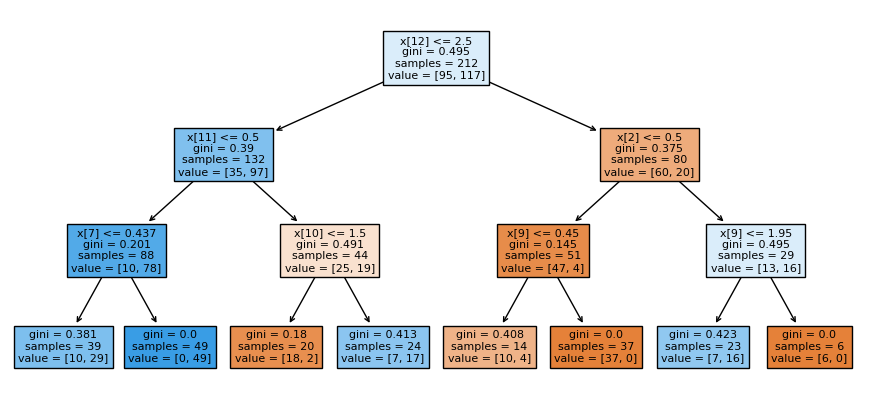

In [258]:
plt.figure(figsize = (11,5))
plot_tree(dtc, filled =True)
plt.show()

In [264]:
f = open("ML Model/DecisionTree_Model.yml", "wb")
pickle.dump(dtc ,f )
f.close()

### Accuracy 
* **LogisticRegression-:** We get accuracy with using LogisticRegression of Training Dataset is :- **86.73%** and test Dataset with score of **77.46%** 
* **DecisionTree Classifier-:** We Get Accuracy With Using DecisionTree Classifier of Training Dataset is :- **85.84%** and test Dataset with score of **80.28%**

So we use **DecisionTree Classifier** for model **DecisionTree Classifier.**